In [25]:
import re 
import numpy as np 
import pandas as pd
import requests
from bs4 import BeautifulSoup
import seaborn as sns
from matplotlib import pyplot as plt



Company = []
Industry = []
Employee_Count = []
Ownership = []
Founded = []
Location = []
Cities = []
Reviews = []
Ratings = []
Salary = []
Interviews = []
Jobs = []

for page in range(1,41):
    url = f"https://www.ambitionbox.com/list-of-companies?locations=bengaluru,hyderabad,chennai,gurgaon&industries=it-services-and-consulting,financial-services,software-product,healthcare,pharma,telecom,bpo&sortBy=popular&tags=startup,public,fortune500__fortune500-2022,forbesglobal2000,government&page={page}"

    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:106.0) Gecko/20100101 Firefox/106.0',
        'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,/;q=0.8',
        'Accept-Language': 'en-US,en;q=0.5',
        # 'Accept-Encoding': 'gzip, deflate, br',
        'DNT': '1',
        'Connection': 'keep-alive',
        'Upgrade-Insecure-Requests': '1',
        'Sec-Fetch-Dest': 'document',
        'Sec-Fetch-Mode': 'navigate',
        'Sec-Fetch-Site': 'none',
        'Sec-Fetch-User': '?1',
    }
    page = requests.get(url,headers = headers)
    soup = BeautifulSoup(page.text)

    for i in soup.find_all("h2",class_="companyCardWrapper__companyName"):
        Company.append(i.text.strip())

    for i in soup.find_all("span", class_="companyCardWrapper__interLinking"):
    #Industry
        if "".join(re.findall("^\w.*\|",i.text.strip())).split("|")[0]:
            Industry.append("".join(re.findall("^\w.*\|",i.text.strip())).split("|")[0])
        else:
            Industry.append(np.nan)
    # Employee_Count

        if re.findall("\|(.*)Employees",i.text.strip()):
            Employee_Count.append("".join(re.findall("\|(.*)Employees",i.text.strip())))
        else:
            Employee_Count.append(np.nan)

    # Ownership

        if re.findall(r"Employees\s+\|\s+([^|]+)\b",i.text.strip()):
            Ownership.append("".join(re.findall(r"Employees\s+\|\s+([^|]+)\b",i.text.strip())))
        else:
            Ownership.append(np.nan)

    # Founded_Years
        if re.findall("(\d+)\syears",i.text.strip()):
            Founded.append("".join(re.findall("(\d+)\syears",i.text.strip())))
        else:
            Founded.append(np.nan)

    # Location
        a = re.findall("(\w+)\s\+\d+|(\w+\s\/\s\w+\s)\+\d+",i.text.strip())
        if len(a)>0:
            Location.append("".join(a[0]))
        else:
            Location.append(np.nan)

    # No of Cities
        if re.findall(r"\+(\d+)\smore",i.text.strip()):
            Cities.append("".join(re.findall(r"\+(\d+)\smore",i.text.strip())))
        else:
            Cities.append(np.nan)

    for i in soup.find_all("div",class_="companyCardWrapper__tertiaryInformation"):
    # SALARY
        if re.findall("Reviews(.*)Salaries",i.text):
            Salary.append("".join(re.findall("Reviews(.*)Salaries",i.text)))
        else:
            Salary.append(np.nan)

    # REVIEWS
        if re.findall("(.*)Reviews",i.text):
            Reviews.append("".join(re.findall("(.*)Reviews",i.text)))
        else:
            Reviews.append(np.nan)

    # INTERVIEW
        if re.findall("Salaries(.*)Interviews",i.text):
            Interviews.append("".join(re.findall("Salaries(.*)Interviews",i.text)))
        else:
            Interviews.append(np.nan)

    # JOBS
        if re.findall("Interviews(.*)Jobs",i.text):
            Jobs.append("".join(re.findall("Interviews(.*)Jobs",i.text)))
        else:
            Jobs.append(np.nan)
        
    # RATINGS    
    for i in soup.find_all("div",class_="companyCardWrapper__companyRatingWrapper"):
        Ratings.append(i.text)

In [26]:
data = {"Company":Company,
"Industry":Industry,
"Ownership":Ownership,
"Location":Location,
"Ratings":Ratings,
"Founded":Founded,
"Cities":Cities,
"Reviews": Reviews,
"Employee_Count":Employee_Count,
"Salary": Salary,
"Interviews": Interviews,
"Jobs":Jobs}

df = pd.DataFrame(data)
df

df.to_csv("ambitionbox_final_data.csv", index = False)
df

,Company,Industry,Ownership,Location,Ratings,Founded,Cities,Reviews,Employee_Count,Salary,Interviews,Jobs
0,TCS,IT Services & Consulting,Public,Chennai,3.8,56,348,77k,1 Lakh+,8.7L,8.1k,1.1k
1,Accenture,IT Services & Consulting,Public,Bangalore / Bengaluru,4.0,35,180,48.1k,1 Lakh+,5.9L,5.9k,34.6k
2,Cognizant,IT Services & Consulting,Forbes Global 2000,Chennai,3.9,30,175,43.4k,1 Lakh+,5.7L,4.6k,--
3,Wipro,IT Services & Consulting,Public,Hyderabad / Secunderabad,3.8,79,278,41.3k,1 Lakh+,4.3L,4.5k,884
4,Capgemini,IT Services & Consulting,Public,Bangalore / Bengaluru,3.8,57,145,35.6k,1 Lakh+,4.3L,3.8k,--
...,...,...,...,...,...,...,...,...,...,...,...,...
795,Take Solutions,IT Services & Consulting,Public,NaN,4.0,NaN,NaN,8,51-200,130,--,--
796,Dishnet Wireless,Telecom,Public,Gurgaon / Gurugram,4.3,26,45,195,1k-5k,429,--,--
797,Ziqitza Health Care,Healthcare,Public,Bangalore / Bengaluru,4.0,19,52,438,5k-10k,1.2k,18,--
798,Ortin Laboratories,Pharma,Public,Hyderabad / Secunderabad,3.9,NaN,1,13,51-200,94,--,--


### DATA EXPLORATION

In [27]:
df2 = pd.read_csv("ambitionbox_final_data.csv")

In [28]:
df2.info() # 53+70+13+41+70

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Company         800 non-null    object 
 1   Industry        800 non-null    object 
 2   Ownership       747 non-null    object 
 3   Location        730 non-null    object 
 4   Ratings         800 non-null    float64
 5   Founded         759 non-null    float64
 6   Cities          730 non-null    float64
 7   Reviews         800 non-null    object 
 8   Employee_Count  787 non-null    object 
 9   Salary          800 non-null    object 
 10  Interviews      800 non-null    object 
 11  Jobs            800 non-null    object 
dtypes: float64(3), object(9)
memory usage: 75.1+ KB


In [29]:
df2.head()

,Company,Industry,Ownership,Location,Ratings,Founded,Cities,Reviews,Employee_Count,Salary,Interviews,Jobs
0,TCS,IT Services & Consulting,Public,Chennai,3.8,56.0,348.0,77k,1 Lakh+,8.7L,8.1k,1.1k
1,Accenture,IT Services & Consulting,Public,Bangalore / Bengaluru,4.0,35.0,180.0,48.1k,1 Lakh+,5.9L,5.9k,34.6k
2,Cognizant,IT Services & Consulting,Forbes Global 2000,Chennai,3.9,30.0,175.0,43.4k,1 Lakh+,5.7L,4.6k,--
3,Wipro,IT Services & Consulting,Public,Hyderabad / Secunderabad,3.8,79.0,278.0,41.3k,1 Lakh+,4.3L,4.5k,884
4,Capgemini,IT Services & Consulting,Public,Bangalore / Bengaluru,3.8,57.0,145.0,35.6k,1 Lakh+,4.3L,3.8k,--


### DATA EXPLORATION OVERVIEW

# DATA CLEANING

In [30]:
df2.isna().sum()

Company            0
Industry           0
Ownership         53
Location          70
Ratings            0
Founded           41
Cities            70
Reviews            0
Employee_Count    13
Salary             0
Interviews         0
Jobs               0
dtype: int64

Columns: Ownership, Location, Founded, Cities and Employee Count contain NaN values, we need to apply data cleaning methods to fill these missing values.

In [31]:
# Jobs Column

df2["Jobs"]= df2["Jobs"].str.replace('-- ','0')
df2["Jobs"] = df2["Jobs"].apply(lambda x: float(x.replace('k',''))*1000 if 'k' in x else float(x))

In [32]:
# Reviews Column

df2["Reviews"] = df2["Reviews"].apply(lambda x: float(x.replace('k',''))*1000 if 'k' in x else float(x))

In [35]:
# Salary Column

df2["Salary"] = df2["Salary"].apply(lambda x: float(x.replace('k','').strip())*1000 if 'k' in x else float(x.replace('L','').strip())*100000 if 'L' in x else float(x))

In [39]:
# Interview Column

df2["Interviews"]= df2["Interviews"].str.replace('-- ','0')
df2["Interviews"] = df2["Interviews"].apply(lambda x: float(x.replace('k',''))*1000 if 'k' in x else float(x))

In [40]:
# Founded(Years)

df2['Founded'] = df2['Founded'].fillna(df2['Founded'].value_counts().index[0])

In [41]:
# Ownership

df2['Ownership'] = df2['Ownership'].fillna(df2['Ownership'].value_counts().index[0])

In [43]:
# Location

df2 = df2.dropna(subset=["Location"])  # column is going to drop because it has no jobs and there are no cities founded and less interviews

In [50]:
# Employee Count

df2 = df2.dropna(subset=["Employee_Count"]) # Employee Count- Has less job count

In [51]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 721 entries, 0 to 799
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Company         721 non-null    object 
 1   Industry        721 non-null    object 
 2   Ownership       721 non-null    object 
 3   Location        721 non-null    object 
 4   Ratings         721 non-null    float64
 5   Founded         721 non-null    float64
 6   Cities          721 non-null    float64
 7   Reviews         721 non-null    float64
 8   Employee_Count  721 non-null    object 
 9   Salary          721 non-null    float64
 10  Interviews      721 non-null    float64
 11  Jobs            721 non-null    float64
dtypes: float64(7), object(5)
memory usage: 73.2+ KB


In [52]:
df2.isna().sum()

Company           0
Industry          0
Ownership         0
Location          0
Ratings           0
Founded           0
Cities            0
Reviews           0
Employee_Count    0
Salary            0
Interviews        0
Jobs              0
dtype: int64

In [53]:
df2["Ratings"] = df2["Ratings"].astype("int64")
df2["Reviews"] = df2["Reviews"].astype("int64")
df2["Salary"] = df2["Salary"].astype("int64")
df2["Interviews"] = df2["Interviews"].astype("int64")
df2["Jobs"] = df2["Jobs"].astype("int64")
df2["Founded"] = df2["Founded"].astype("int64")
df2["Cities"] = df2["Cities"].astype("int64")

### 1. Univariate Analysis

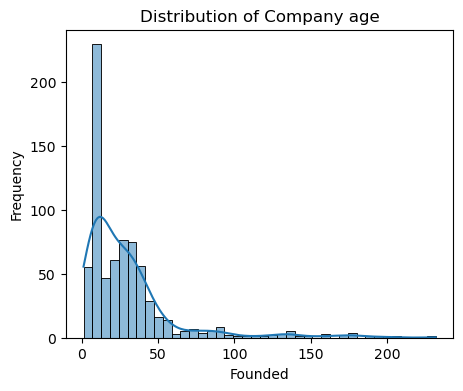

In [104]:
plt.figure(figsize=(5,4))
sns.histplot(df2['Founded'],kde=True)
plt.title(f'Distribution of Company age')
plt.xlabel("Founded")
plt.ylabel('Frequency')
plt.show()

In [110]:
df2["Founded"].max()

232

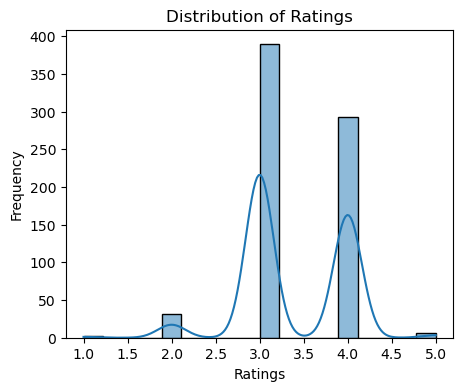

In [56]:
from matplotlib import pyplot as plt
import seaborn as sns


plt.figure(figsize=(5,4))
sns.histplot(df2['Ratings'],kde=True)
plt.title(f'Distribution of Ratings')
plt.xlabel("Ratings")
plt.ylabel('Frequency')
plt.show()

In [58]:
df2[df2["Ratings"] == df2["Ratings"].max()]

,Company,Industry,Ownership,Location,Ratings,Founded,Cities,Reviews,Employee_Count,Salary,Interviews,Jobs
485,WeNet Global,IT Services & Consulting,Startup,Gurgaon / Gurugram,5,2,3,64,51-200,7,1,0
646,Euphoric Thought Technologies,IT Services & Consulting,Startup,Bangalore / Bengaluru,5,6,1,14,51-200,38,0,0
654,Sasken Network Engineering,IT Services & Consulting,Public,Bangalore / Bengaluru,5,20,1,13,51-200,76,0,0
766,IQnext,Software Product,Startup,Bangalore / Bengaluru,5,8,1,11,11-50,91,1,0
779,Peso : Accounts Receivables Automation Software,Software Product,Startup,Bangalore / Bengaluru,5,1,1,10,1-10,3,1,0
789,Peso : Accounts Receivables Automation Software,Software Product,Startup,Bangalore / Bengaluru,5,1,1,10,1-10,3,1,0


In [59]:
df2[df2["Ratings"] == df2["Ratings"].min()]

,Company,Industry,Ownership,Location,Ratings,Founded,Cities,Reviews,Employee_Count,Salary,Interviews,Jobs
429,Prathigna.com HR Solutions,IT Services & Consulting,Startup,Bangalore / Bengaluru,1,9,4,50,51-200,207,1,9
790,Starcom Information Technology,IT Services & Consulting,Public,Bangalore / Bengaluru,1,12,3,11,11-50,129,0,0


### Insights

1. The distribution plot illustrates the variation in ratings across companies, highlighting the prevalence of specific rating ranges within the dataset.

2. Most companies have a rating around 3, indicating a common rating trend among the sampled companies.

3. Among the companies, **Prathigna.com HR Solutions** and **Starcom Information Technology** received the lowest rating of 1, while 6 companies received the highest rating of 5. This showcases the range of ratings observed in the dataset, from the lowest to the highest rated companies.

<Axes: ylabel='Industry'>

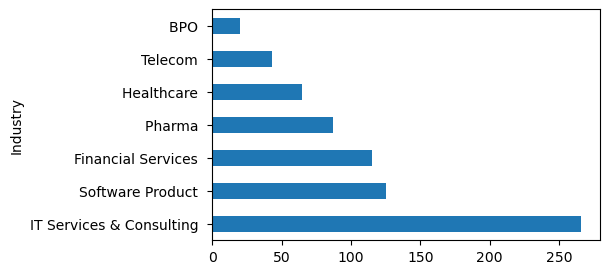

In [60]:
df2['Industry'].value_counts().plot(kind='barh',figsize=(5,3))
plt.title('Distribution of Industry(Sector)')


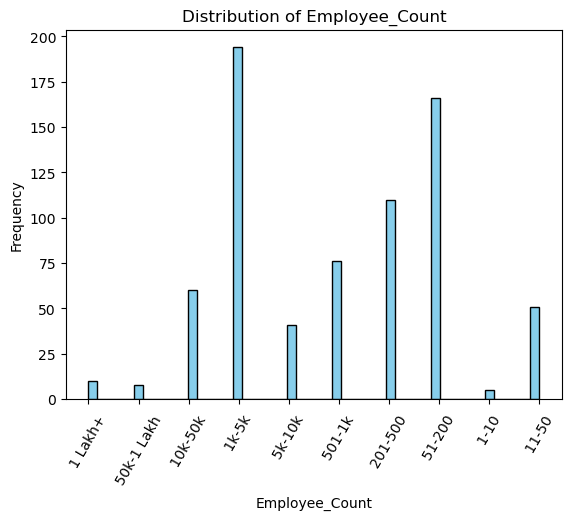

In [61]:
plt.hist(df2['Employee_Count'],bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Employee_Count')
plt.ylabel('Frequency')
plt.title('Distribution of Employee_Count')
plt.xticks(rotation = 60)
plt.show()

In [62]:
df2[df2["Employee_Count"]==df2["Employee_Count"].max()]

,Company,Industry,Ownership,Location,Ratings,Founded,Cities,Reviews,Employee_Count,Salary,Interviews,Jobs
37,Tata Elxsi,IT Services & Consulting,Public,Bangalore / Bengaluru,4,35,26,1700,5k-10k,17200,234,0
42,Vodafone Idea,Telecom,Public,Hyderabad / Secunderabad,4,6,641,14200,5k-10k,56400,487,25
44,Verizon,Telecom,Forbes Global 2000,Chennai,4,24,10,1300,5k-10k,10700,84,0
46,Thomson Reuters,Software Product,Forbes Global 2000,Bangalore / Bengaluru,4,16,24,1400,5k-10k,10300,77,0
50,Oracle Cerner,IT Services & Consulting,Public,Bangalore / Bengaluru,3,45,5,1200,5k-10k,11500,137,0
53,Mercedes-Benz Research & Development India,IT Services & Consulting,Public,Bangalore / Bengaluru,4,28,47,1300,5k-10k,15200,162,127
56,KPIT Technologies,Software Product,Public,Bangalore / Bengaluru,3,34,32,2300,5k-10k,20300,221,0
61,ANZ Banking Group,Financial Services,Forbes Global 2000,Bangalore / Bengaluru,4,17,16,908,5k-10k,7400,72,21
64,Aon,Financial Services,Forbes Global 2000,Gurgaon / Gurugram,3,84,18,1100,5k-10k,5500,48,0
65,VMware Software,Software Product,Forbes Global 2000,Bangalore / Bengaluru,4,26,17,999,5k-10k,10200,133,53


In [63]:
df2[df2["Employee_Count"]==df2["Employee_Count"].min()]

,Company,Industry,Ownership,Location,Ratings,Founded,Cities,Reviews,Employee_Count,Salary,Interviews,Jobs
0,TCS,IT Services & Consulting,Public,Chennai,3,56,348,77000,1 Lakh+,869999,8100,1100
1,Accenture,IT Services & Consulting,Public,Bangalore / Bengaluru,4,35,180,48100,1 Lakh+,590000,5900,34600
2,Cognizant,IT Services & Consulting,Forbes Global 2000,Chennai,3,30,175,43400,1 Lakh+,570000,4600,0
3,Wipro,IT Services & Consulting,Public,Hyderabad / Secunderabad,3,79,278,41300,1 Lakh+,430000,4500,884
4,Capgemini,IT Services & Consulting,Public,Bangalore / Bengaluru,3,57,145,35600,1 Lakh+,430000,3800,0
5,Infosys,IT Services & Consulting,Public,Bangalore / Bengaluru,3,43,183,33400,1 Lakh+,470000,6000,1200
6,Genpact,IT Services & Consulting,Public,Hyderabad / Secunderabad,3,27,118,27000,1 Lakh+,200000,2500,0
7,HCLTech,IT Services & Consulting,Public,Chennai,3,33,184,30000,1 Lakh+,310000,3100,0
8,IBM,IT Services & Consulting,Public,Bangalore / Bengaluru,4,113,149,19900,1 Lakh+,220000,1900,3300
10,Tech Mahindra,IT Services & Consulting,Public,Hyderabad / Secunderabad,3,38,271,28500,1 Lakh+,260000,2900,504


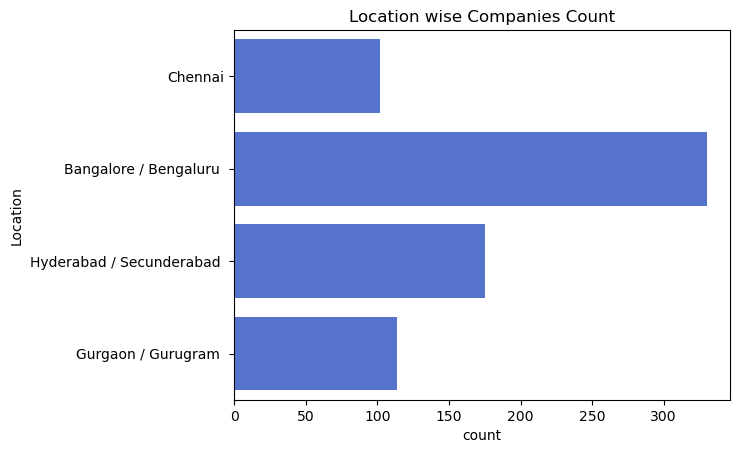

In [105]:
sns.countplot(y='Location',data=df2,color='#4169E1')
plt.title("Location wise Companies Count")
plt.show()

<Axes: xlabel='Ownership'>

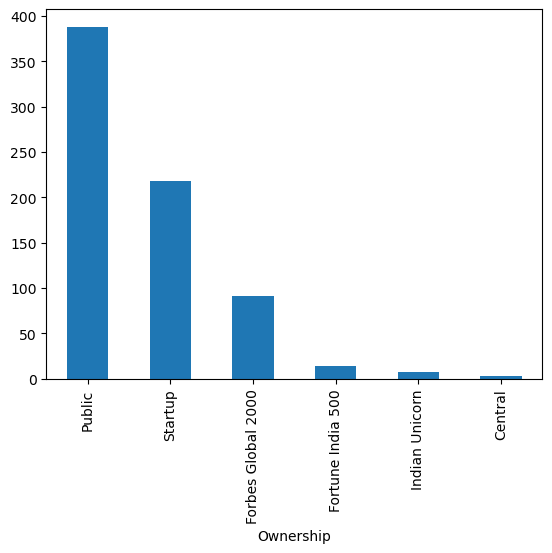

In [65]:
df2["Ownership"].value_counts().plot(kind="bar")

<Axes: ylabel='count'>

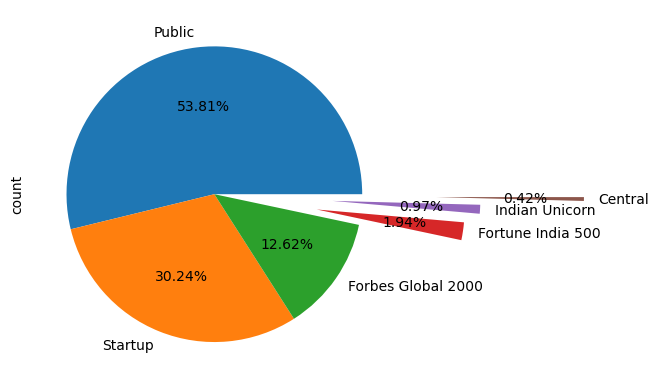

In [101]:
df2["Ownership"].value_counts().plot(kind="pie",autopct="%.2f%%", explode=[0.0,0.0,0.0,0.7,0.8,1.5])

## Insights

This count plot depicts the distribution of company types in the dataset, highlighting that public companies are the most prevalent compared to other types.

In [120]:
import warnings
warnings.filterwarnings('ignore')

<Figure size 500x400 with 0 Axes>

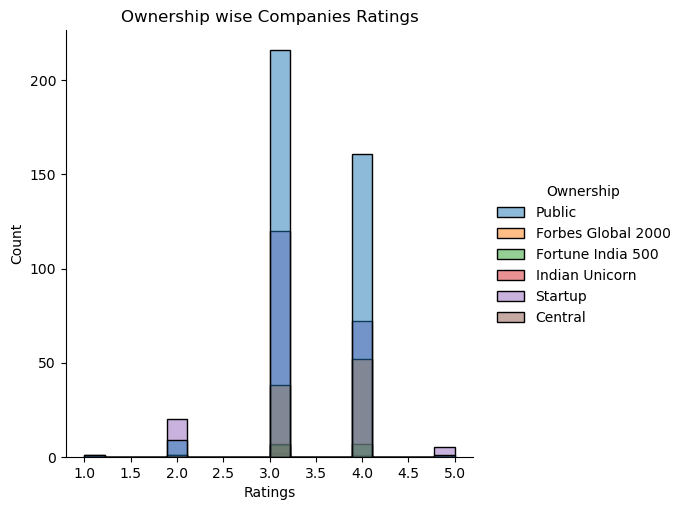

In [121]:
plt.figure(figsize=(5,4))
sns.displot(data = df2 , x = 'Ratings' , kind = 'hist' , hue = 'Ownership')
plt.title("Ownership wise Companies Ratings")
plt.show()

<Figure size 500x400 with 0 Axes>

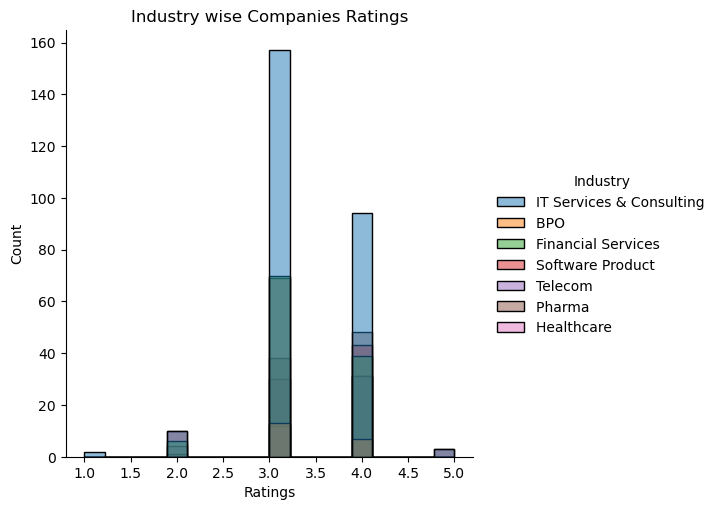

In [122]:
plt.figure(figsize=(5,4))
sns.displot(data = df2 , x = 'Ratings' , kind = 'hist' , hue = 'Industry')
plt.title("Industry wise Companies Ratings")
plt.show()

<Figure size 500x400 with 0 Axes>

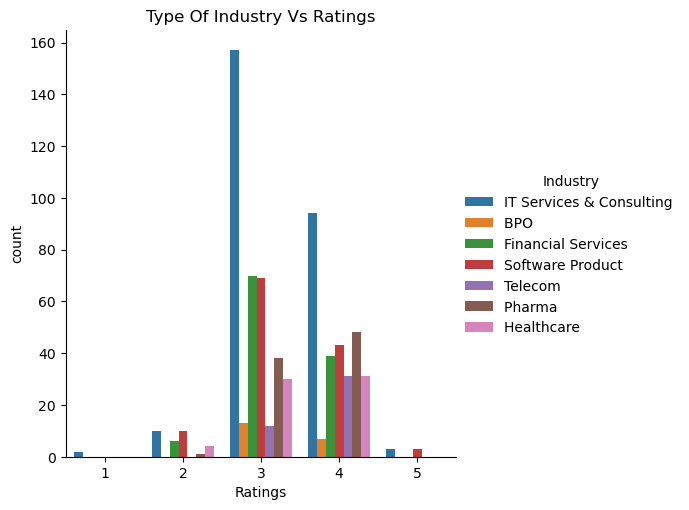

In [149]:
plt.figure(figsize=(5,4))
sns.catplot(data = df2 , x = 'Ratings' , hue = 'Industry' , kind = 'count')
plt.title("Type Of Industry Vs Ratings")
plt.show()

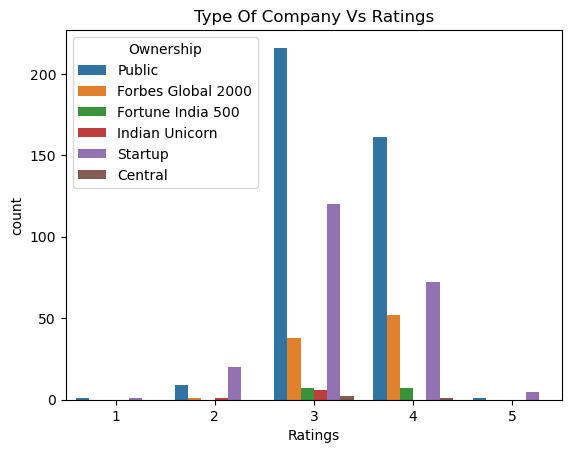

In [147]:
sns.countplot(data = df2 , x = 'Ratings' , hue = 'Ownership' )
plt.title("Type Of Company Vs Ratings")
plt.show()

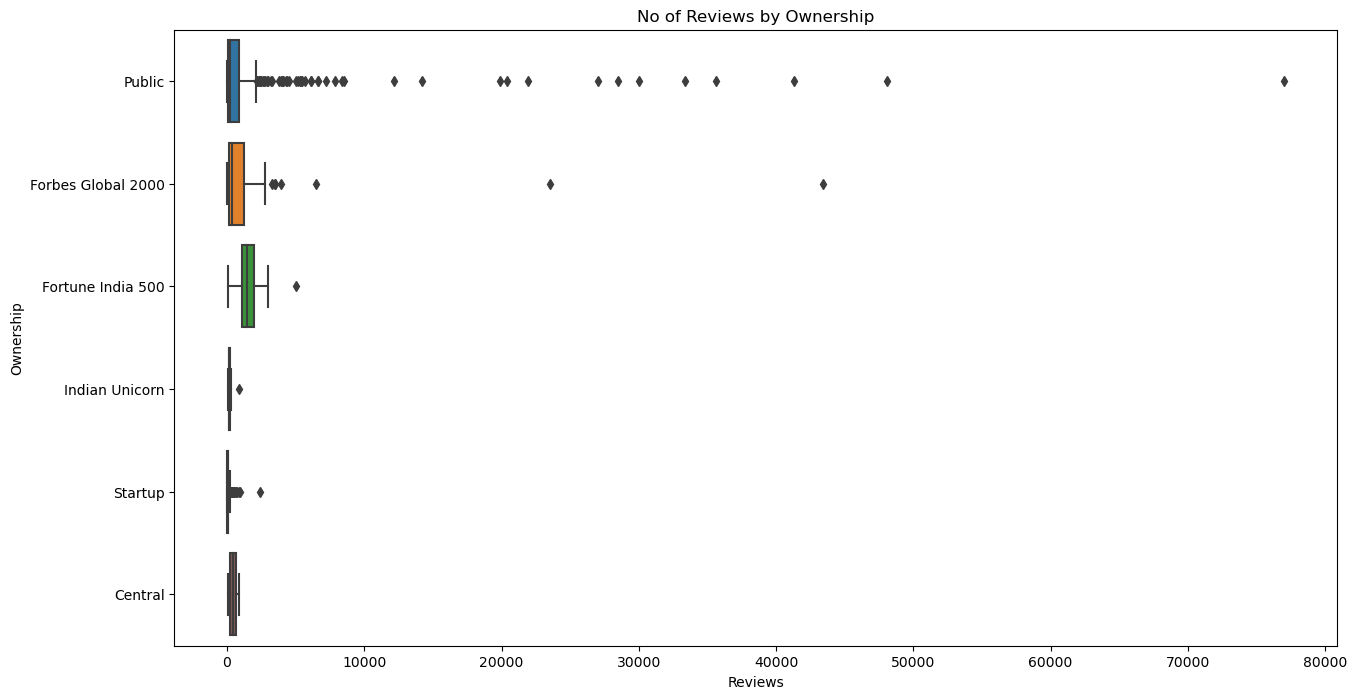

In [124]:
plt.figure(figsize = (15,8))
sns.boxplot(data=df2, x = df2['Reviews'], y=df2['Ownership'])
plt.title('No of Reviews by Ownership')
plt.show()

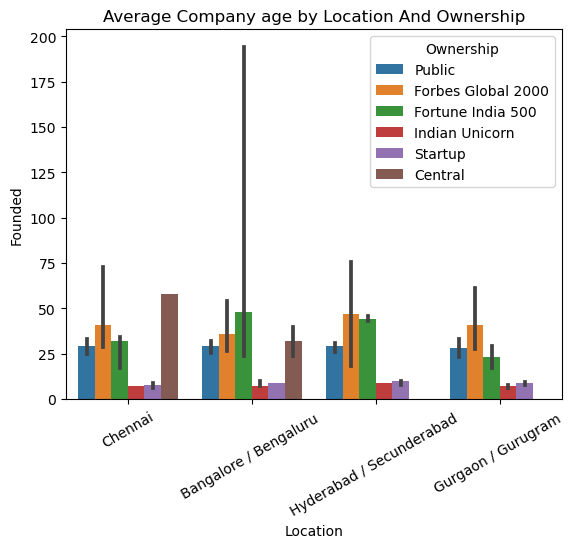

In [152]:
sns.barplot(data = df2, x="Location", y = "Founded", hue = "Ownership", estimator = "median")
plt.xticks(rotation = 30)
plt.title("Average Company age by Location And Ownership")
plt.show()

### 2. Bivariate Analysis

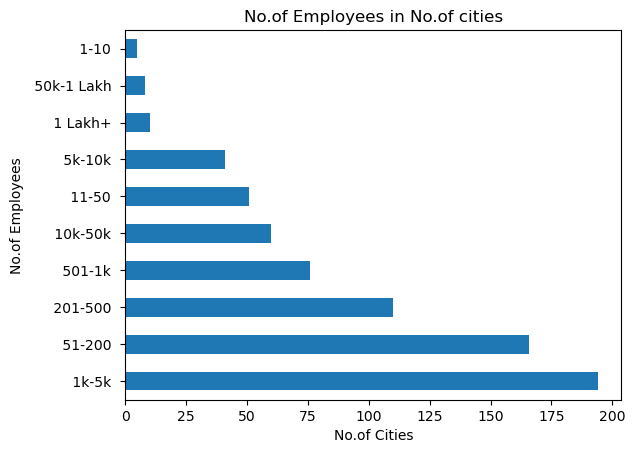

In [71]:
df2['Employee_Count'].value_counts().plot(kind='barh')
plt.title("No.of Employees in No.of cities")
plt.xlabel("No.of Cities")
plt.ylabel("No.of Employees")
plt.show()

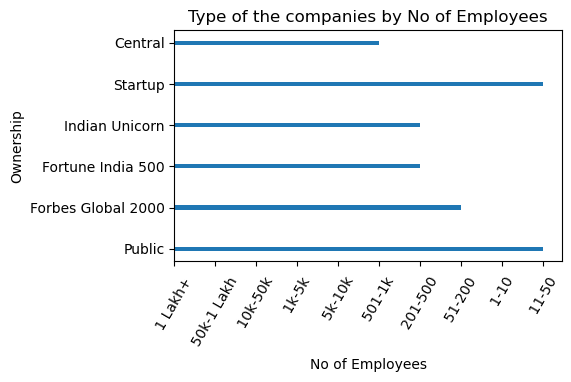

In [73]:
plt.figure(figsize=(5, 3))
plt.barh(y=df2['Ownership'], width=df2['Employee_Count'], height=0.1)
plt.xlabel('No of Employees')
plt.ylabel('Ownership')
plt.title('Type of the companies by No of Employees')
plt.xticks(rotation = 60)
plt.show()

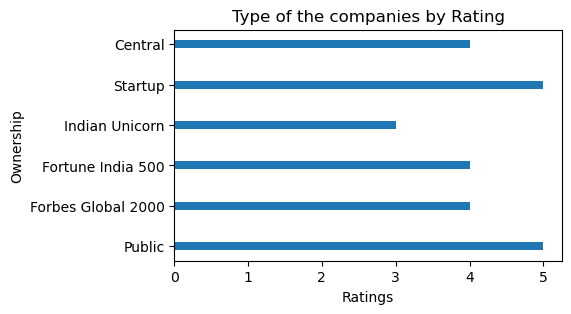

In [74]:
plt.figure(figsize=(5, 3))
plt.barh(y=df2['Ownership'], width=df2['Ratings'], height=0.2)
plt.xlabel('Ratings')
plt.ylabel('Ownership')
plt.title('Type of the companies by Rating')
plt.show()

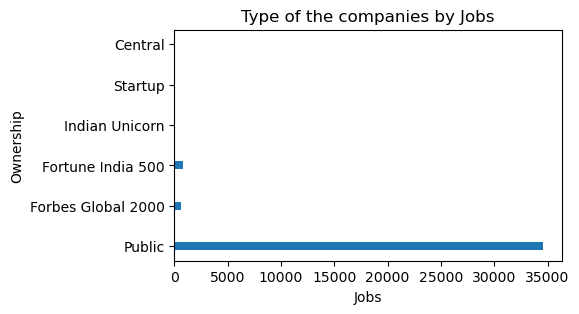

In [76]:
plt.figure(figsize=(5, 3))
plt.barh(y=df2['Ownership'], width=df2['Jobs'], height=0.2)
plt.xlabel('Jobs')
plt.ylabel('Ownership')
plt.title('Type of the companies by Jobs')
plt.show()

In [142]:
corr_df2 = df2[['Founded','Reviews', 'Jobs' ]].corr()

<Axes: >

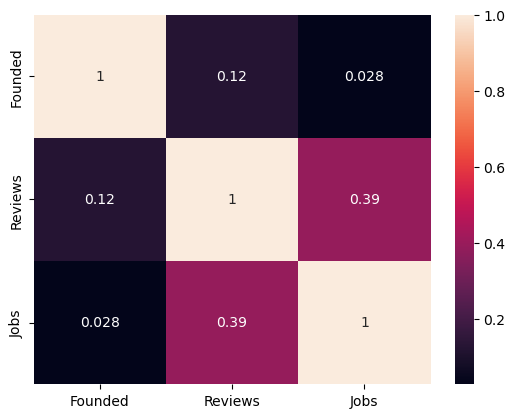

In [144]:
sns.heatmap(corr_df2,annot = True)

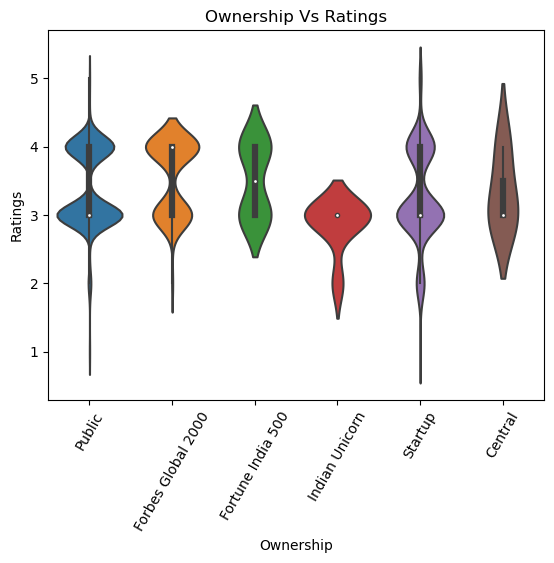

In [107]:
sns.violinplot(x=df2["Ownership"], y=df2["Ratings"])
plt.xticks(rotation = 60)
plt.title("Ownership Vs Ratings")
plt.show()

In [100]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 721 entries, 0 to 799
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Company         721 non-null    object
 1   Industry        721 non-null    object
 2   Ownership       721 non-null    object
 3   Location        721 non-null    object
 4   Ratings         721 non-null    int64 
 5   Founded         721 non-null    int64 
 6   Cities          721 non-null    int64 
 7   Reviews         721 non-null    int64 
 8   Employee_Count  721 non-null    object
 9   Salary          721 non-null    int64 
 10  Interviews      721 non-null    int64 
 11  Jobs            721 non-null    int64 
dtypes: int64(7), object(5)
memory usage: 73.2+ KB


In [145]:
df2.head()

,Company,Industry,Ownership,Location,Ratings,Founded,Cities,Reviews,Employee_Count,Salary,Interviews,Jobs
0,TCS,IT Services & Consulting,Public,Chennai,3,56,348,77000,1 Lakh+,869999,8100,1100
1,Accenture,IT Services & Consulting,Public,Bangalore / Bengaluru,4,35,180,48100,1 Lakh+,590000,5900,34600
2,Cognizant,IT Services & Consulting,Forbes Global 2000,Chennai,3,30,175,43400,1 Lakh+,570000,4600,0
3,Wipro,IT Services & Consulting,Public,Hyderabad / Secunderabad,3,79,278,41300,1 Lakh+,430000,4500,884
4,Capgemini,IT Services & Consulting,Public,Bangalore / Bengaluru,3,57,145,35600,1 Lakh+,430000,3800,0
